### Imports

In [20]:
include("../Commandline.jl")
include("../Params.jl")
include("../Solution.jl")
include("../LocalSearch.jl")
include("../GeneticAlgorithm.jl")
include("../PlotResults.jl");

In [21]:
instance_name = "nug30.dat"
# Simulate commandline arguments
args = Dict(
    "cpu_time" => 120, "seed" => 0, 
    "instance_path" => "..\\..\\instances\\$instance_name", 
    "sol" => "..\\..\\outputs\\sol-$instance_name"
)
c = Commandline(true, args["cpu_time"], args["seed"], args["instance_path"], args["sol"])

params = Params(c.instance_path, c.output_path, c.seed, c.cpu_time)

seed = 10

10

## Compare basic methods

#### Multistart LS - Swap neighborhood

In [3]:
solLS, resLS = multistartLS(params, 100)
println("Multistart LS solution:")
printSolution(solLS)
println()

Multistart LS solution:
Permutation=[40, 14, 36, 2, 72, 9, 135, 33, 87, 131, 99, 146, 117, 83, 24, 74, 71, 145, 54, 57, 86, 3, 41, 59, 50, 17, 114, 23, 140, 109, 11, 1, 137, 89, 70, 102, 39, 15, 5, 147, 16, 62, 133, 100, 75, 92, 144, 43, 76, 67, 118, 22, 91, 110, 142, 73, 18, 108, 27, 149, 26, 116, 52, 61, 93, 82, 123, 58, 42, 47, 101, 51, 56, 115, 105, 126, 19, 120, 112, 80, 98, 107, 49, 37, 65, 119, 88, 35, 28, 129, 139, 31, 138, 63, 21, 84, 13, 45, 4, 55, 81, 29, 38, 85, 10, 60, 127, 90, 12, 77, 95, 30, 66, 136, 111, 79, 96, 113, 6, 103, 148, 69, 53, 128, 125, 132, 78, 8, 46, 64, 68, 124, 130, 44, 34, 94, 121, 32, 150, 143, 104, 25, 106, 134, 97, 20, 7, 141, 48, 122]
Cost=516997841



In [4]:
resLS

Dict{String,Any} with 5 entries:
  "time"        => 258.975
  "gap"         => 0.0362825
  "finalCost"   => 516997841
  "numTrials"   => 1
  "permutation" => [40, 14, 36, 2, 72, 9, 135, 33, 87, 131  …  104, 25, 106, 13…

#### Multistart LS - Cyclic neighborhood

In [5]:
solLS, resLS = multistartLS(params, 50000, localSearchFunc=cyclicHeuristic)
println("Multistart cyclic LS solution:")
printSolution(solLS)
println()

Multistart cyclic LS solution:
Permutation=[50, 34, 46, 29, 85, 115, 149, 75, 133, 17, 80, 74, 11, 117, 124, 73, 112, 8, 3, 145, 98, 127, 94, 18, 107, 78, 105, 55, 27, 14, 37, 76, 7, 16, 150, 60, 120, 71, 122, 138, 32, 52, 31, 54, 92, 130, 70, 28, 33, 56, 148, 91, 53, 119, 88, 108, 143, 90, 10, 123, 125, 38, 132, 77, 20, 113, 47, 63, 101, 81, 111, 82, 42, 95, 109, 129, 96, 135, 140, 57, 141, 44, 65, 22, 36, 59, 99, 30, 142, 102, 87, 106, 21, 24, 51, 35, 61, 136, 40, 23, 103, 116, 12, 43, 72, 68, 69, 2, 4, 93, 26, 84, 39, 104, 5, 126, 48, 58, 15, 1, 66, 19, 97, 89, 110, 9, 62, 13, 131, 49, 83, 114, 139, 45, 86, 128, 41, 79, 6, 118, 100, 25, 137, 144, 147, 67, 146, 121, 64, 134]
Cost=621016822



In [6]:
resLS

Dict{String,Any} with 5 entries:
  "time"        => 120.003
  "gap"         => 0.244781
  "finalCost"   => 621016822
  "numTrials"   => 7671
  "permutation" => [50, 34, 46, 29, 85, 115, 149, 75, 133, 17  …  100, 25, 137,…

## GA - Case study analysis

### Compare different recombination methods

In [29]:
sz = 100
gen = 400
mutate=cyclicHeuristic
selection=biasedFitnessSelection #fitnessSelection
#selectionOpts=Dict{String,Any}()
selectionOpts=Dict{String,Any}("fitnessThreshold"=>0.45)

Random.seed!(seed)
bestSol, resLS = multistartLS(params,gen)
println("Multistart Local Search solution:")
printSolution(bestSol)
println()


Random.seed!(seed)
solGA, res = runGA(params, gen, sz, recombineOp=order1cx,
                   selectionOp=selection, selectionOpts=selectionOpts,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()


Random.seed!(seed)
solGA, res2 = runGA(params, gen, sz, recombineOp=PMXcx,
                   selectionOp=selection, selectionOpts=selectionOpts,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()


Random.seed!(seed)
solGA, res3 = runGA(params, gen, sz, recombineOp=cyclecx,
                   selectionOp=selection, selectionOpts=selectionOpts,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()


Multistart Local Search solution:
Permutation=[15, 18, 27, 3, 14, 20, 17, 23, 11, 16, 30, 4, 1, 22, 8, 7, 19, 25, 24, 12, 10, 9, 29, 28, 5, 6, 26, 13, 2, 21]
Cost=6160

GA solution:
Permutation=[4, 30, 19, 29, 2, 5, 16, 27, 20, 14, 10, 13, 3, 8, 7, 21, 9, 18, 15, 25, 22, 1, 17, 24, 11, 28, 6, 12, 23, 26]
Cost=6698

GA solution:
Permutation=[5, 9, 21, 2, 3, 4, 26, 13, 28, 29, 20, 14, 6, 10, 11, 30, 16, 27, 12, 7, 22, 25, 23, 18, 24, 1, 8, 19, 17, 15]
Cost=6416

GA solution:
Permutation=[28, 15, 18, 27, 23, 14, 25, 22, 11, 30, 3, 20, 1, 8, 7, 19, 16, 4, 17, 6, 13, 10, 9, 29, 24, 12, 26, 2, 21, 5]
Cost=6434



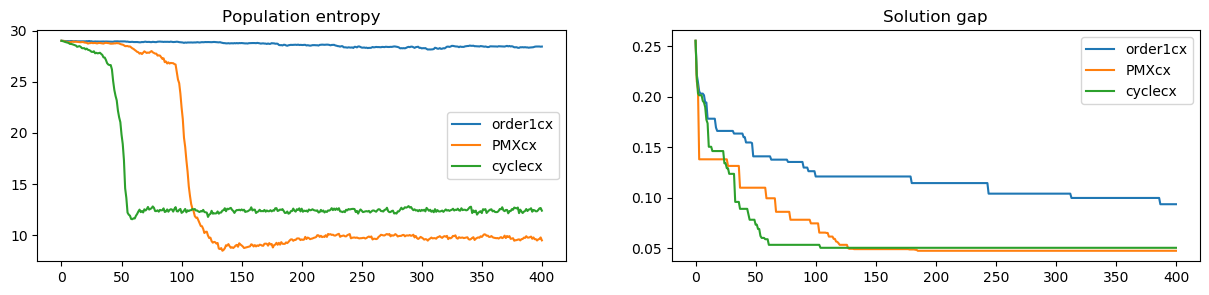

In [30]:
figure(figsize=(15,3))
subplot(121)
title("Population entropy")
plot(0:length(res["entropy"])-1, res["entropy"], label="order1cx")
plot(res2["entropy"], label="PMXcx")
plot(res3["entropy"], label="cyclecx")
#plot(res4["entropy"], label="res4")
#plot(res5["entropy"], label="res5")
legend()
subplot(122)
title("Solution gap")
plot(0:length(res["gap"])-1, res["gap"], label="order1cx")
plot(res2["gap"], label="PMXcx")
plot(res3["gap"], label="cyclecx")
#plot(res4["gap"], label="res4")
#plot(res5["cost"], label="res5")
legend();

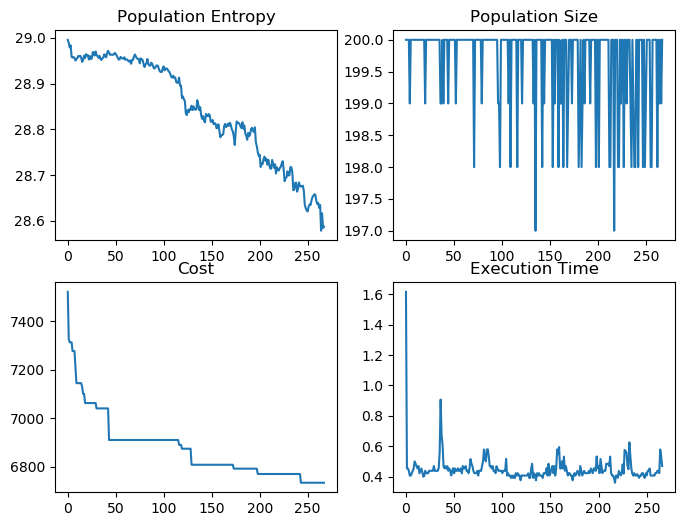

In [24]:
plotResults(res);

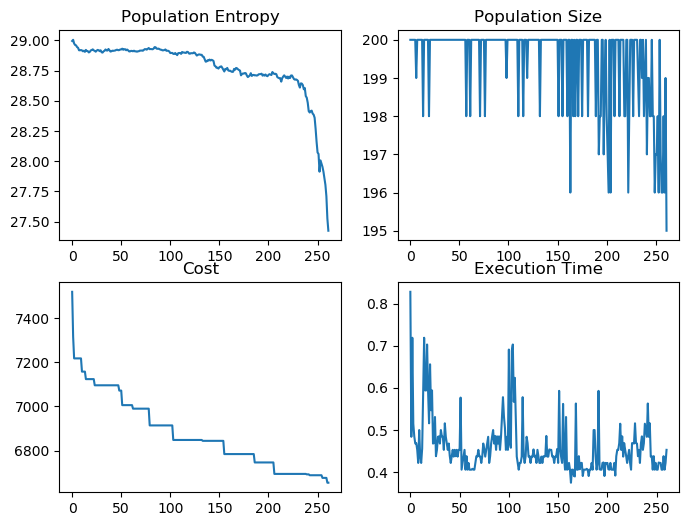

In [25]:
plotResults(res2);

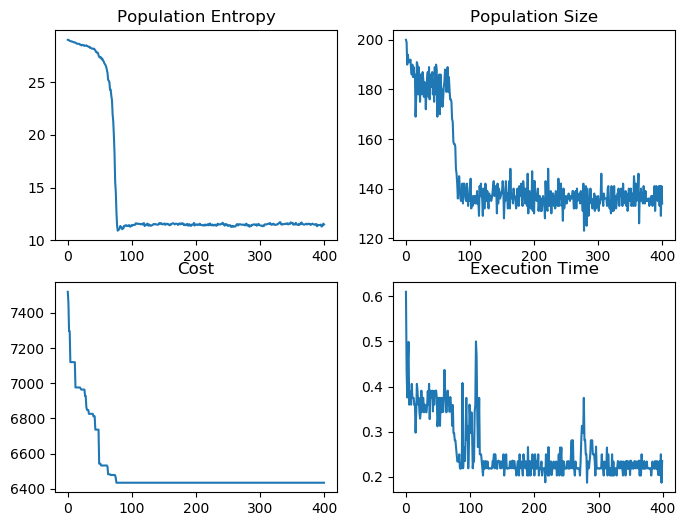

In [26]:
plotResults(res3);

## Survivors Analysis

#### Generate population

In [10]:
populationSize = 500

# Initialize population with random candidate solutions
population = initializePopulation(params,populationSize);

In [11]:
for (k,p) in enumerate(population[1:3])
    println("Soln $k: ",p.permutation) 
end

Soln 1: [17, 16, 4, 15, 7, 24, 2, 30, 11, 14, 19, 6, 27, 18, 23, 9, 8, 22, 29, 13, 28, 12, 26, 21, 10, 20, 3, 25, 5, 1]
Soln 2: [22, 2, 7, 3, 28, 1, 20, 16, 4, 23, 25, 6, 29, 15, 8, 19, 24, 11, 18, 10, 12, 14, 30, 21, 13, 26, 27, 5, 17, 9]
Soln 3: [18, 7, 26, 29, 1, 3, 16, 11, 28, 9, 10, 5, 15, 12, 22, 13, 25, 6, 27, 23, 19, 14, 24, 21, 17, 8, 30, 4, 20, 2]


#### Generate offspring

In [12]:
recombineOp=cyclecx

# Select parents
population = shuffle!(population);
parents = [(population[i], population[i+Int(floor(length(population)/2))]) 
                   for i=1:Int(floor(length(population)/2))]
# Recombine pairs of solutions
offspring = recombinationOp(parents, recombineOp)

# No mutation
population = vcat(population,offspring);

In [13]:
entropy(population, hamming, mean)

28.973317317317317

In [14]:
length(population)

1000

#### Calculate Fitness and Diversity of individuals

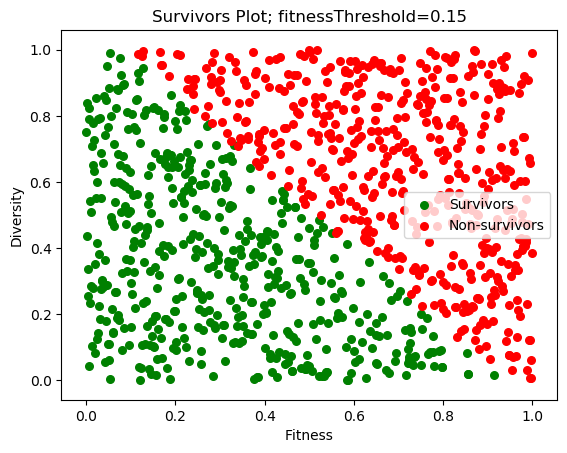

In [16]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.15, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

indexScore, diversityScore, fitnessScore = fitnessDiversityScore(population,hamming)
fig = figure()
title("Survivors Plot; fitnessThreshold=0.15")
xlabel("Fitness")
ylabel("Diversity")
G = scatter(fitnessScore[survivors],diversityScore[survivors],color="green", label="Survivors", s=30)
R = scatter(fitnessScore[.~survivors],diversityScore[.~survivors],color="red", label = "Non-survivors", s=30)
legend(loc="right");

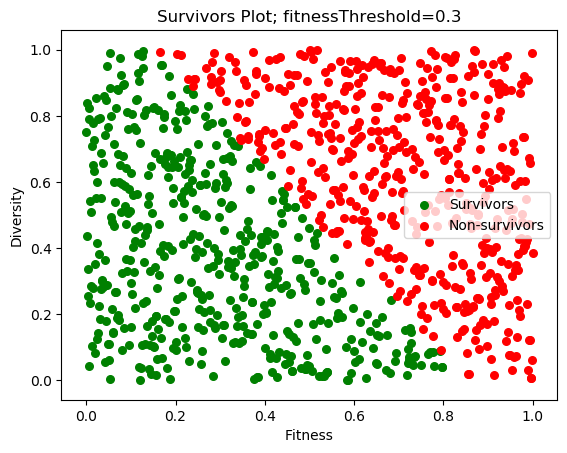

In [17]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.3, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

indexScore, diversityScore, fitnessScore = fitnessDiversityScore(population,hamming)
fig = figure()
title("Survivors Plot; fitnessThreshold=0.3")
xlabel("Fitness")
ylabel("Diversity")
G = scatter(fitnessScore[survivors],diversityScore[survivors],color="green", label="Survivors", s=30)
R = scatter(fitnessScore[.~survivors],diversityScore[.~survivors],color="red", label = "Non-survivors", s=30)
legend(loc="right");

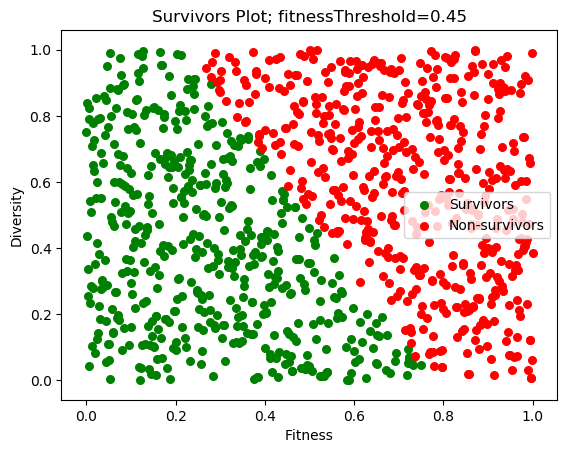

In [18]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.45, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

indexScore, diversityScore, fitnessScore = fitnessDiversityScore(population,hamming)
fig = figure()
title("Survivors Plot; fitnessThreshold=0.45")
xlabel("Fitness")
ylabel("Diversity")
G = scatter(fitnessScore[survivors],diversityScore[survivors],color="green", label="Survivors", s=30)
R = scatter(fitnessScore[.~survivors],diversityScore[.~survivors],color="red", label = "Non-survivors", s=30)
legend(loc="right");

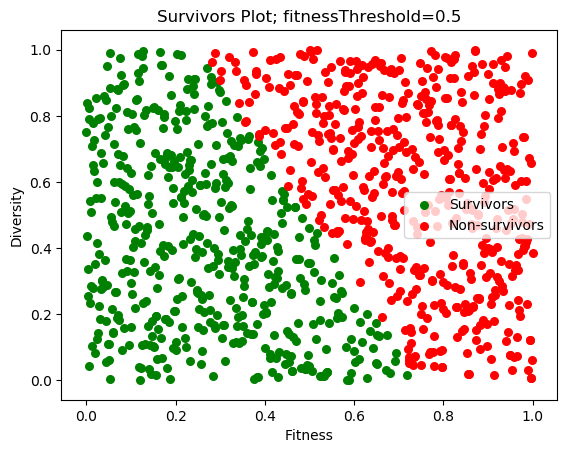

In [19]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.5, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

indexScore, diversityScore, fitnessScore = fitnessDiversityScore(population,hamming)
fig = figure()
title("Survivors Plot; fitnessThreshold=0.5")
xlabel("Fitness")
ylabel("Diversity")
G = scatter(fitnessScore[survivors],diversityScore[survivors],color="green", label="Survivors", s=30)
R = scatter(fitnessScore[.~survivors],diversityScore[.~survivors],color="red", label = "Non-survivors", s=30)
legend(loc="right");

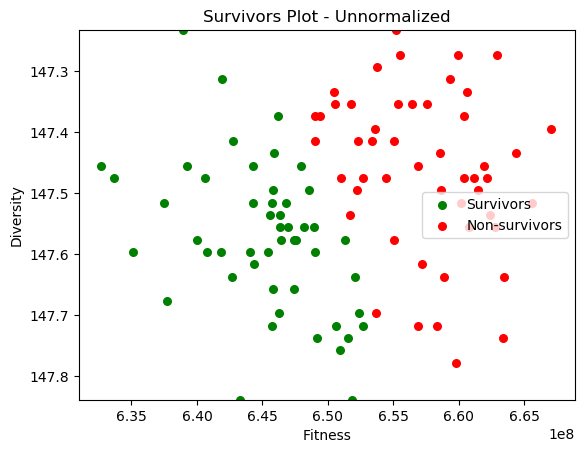

In [45]:
divContrib = [diversityContrib(s1, population, hamming) for s1 in population]
fitness = [s1.cost for s1 in population]
plotSurvivorsUnnorm(fitness, divContrib, survivors);

### Compare different Selection strategies

In [35]:
sz = 100
gen = 200
recombine=cyclecx
mutate=cyclicHeuristic

Random.seed!(seed)
solGA, res = runGA(params, gen, sz, recombineOp=recombine,
                   selectionOp=fitnessSelection,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

Random.seed!(seed)
solGA, res2 = runGA(params, gen, sz, recombineOp=recombine,
                   #selectionOp=fitnessSelection)
                   selectionOp=biasedFitnessSelection, 
                   selectionOpts=Dict{String,Any}("fitnessThreshold"=>0.15),
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

Random.seed!(seed)
solGA, res3 = runGA(params, gen, sz, recombineOp=recombine,
                   #selectionOp=fitnessSelection)
                   selectionOp=biasedFitnessSelection, 
                   selectionOpts=Dict{String,Any}("fitnessThreshold"=>0.3),
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

Random.seed!(seed)
solGA, res4 = runGA(params, gen, sz, recombineOp=recombine,
                   #selectionOp=fitnessSelection)
                   selectionOp=biasedFitnessSelection, 
                   selectionOpts=Dict{String,Any}("fitnessThreshold"=>0.45),
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

GA solution:
Permutation=[2, 4, 28, 30, 21, 3, 25, 29, 16, 19, 8, 20, 5, 9, 13, 7, 23, 14, 26, 10, 6, 11, 22, 27, 17, 24, 12, 1, 18, 15]
Cost=6502

GA solution:
Permutation=[14, 20, 19, 22, 23, 18, 4, 30, 27, 3, 11, 1, 29, 16, 9, 7, 8, 26, 21, 2, 15, 10, 25, 17, 5, 28, 13, 6, 12, 24]
Cost=6574

GA solution:
Permutation=[5, 12, 6, 23, 18, 15, 17, 24, 1, 22, 3, 14, 26, 10, 25, 8, 11, 20, 2, 13, 7, 9, 16, 27, 21, 29, 19, 30, 4, 28]
Cost=6440

GA solution:
Permutation=[28, 15, 18, 27, 23, 14, 25, 22, 11, 30, 3, 20, 1, 8, 7, 19, 16, 4, 17, 6, 13, 10, 9, 29, 24, 12, 26, 2, 21, 5]
Cost=6434



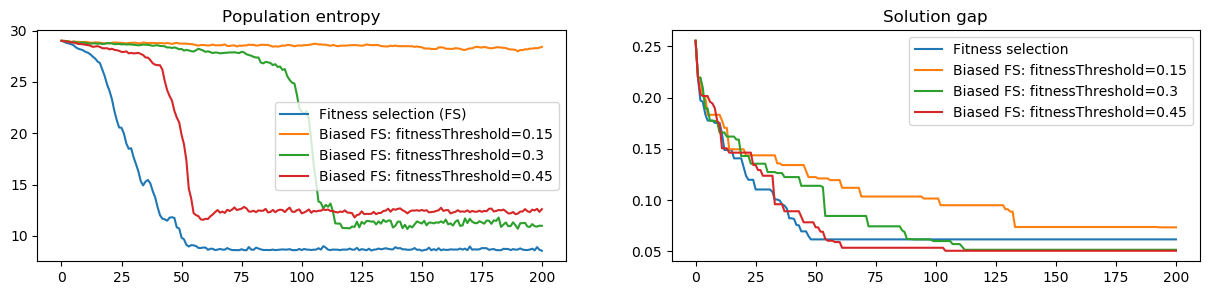

In [36]:
figure(figsize=(15,3))
subplot(121)
title("Population entropy")
plot(0:length(res["entropy"])-1, res["entropy"], label="Fitness selection (FS)")
plot(res2["entropy"], label="Biased FS: fitnessThreshold=0.15")
plot(res3["entropy"], label="Biased FS: fitnessThreshold=0.3")
plot(res4["entropy"], label="Biased FS: fitnessThreshold=0.45")
#plot(res5["entropy"], label="res5")
legend()
subplot(122)
title("Solution gap")
plot(0:length(res["gap"])-1, res["gap"], label="Fitness selection")
plot(res2["gap"], label="Biased FS: fitnessThreshold=0.15")
plot(res3["gap"], label="Biased FS: fitnessThreshold=0.3")
plot(res4["gap"], label="Biased FS: fitnessThreshold=0.45")
#plot(res5["cost"], label="res5")
legend();

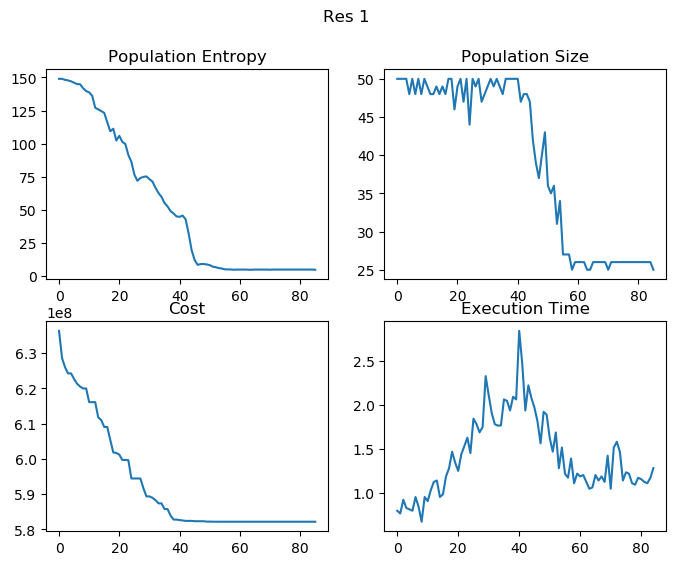

In [50]:
plotResults(res)
suptitle("Res 1");

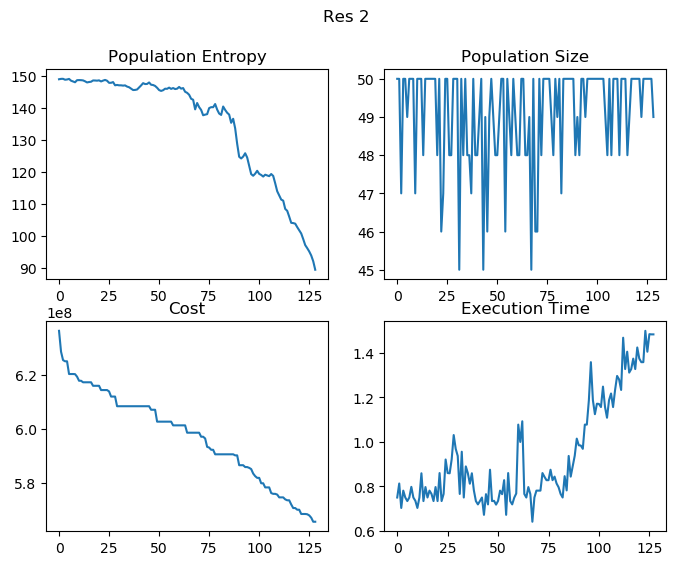

In [51]:
plotResults(res2)
suptitle("Res 2");

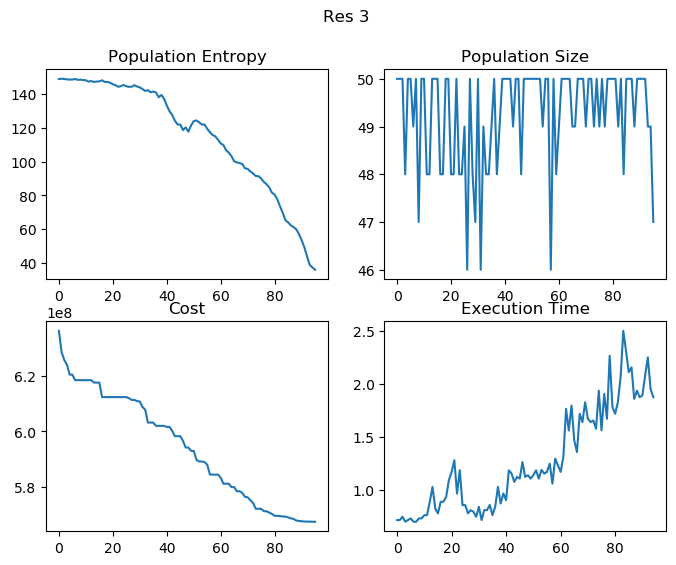

In [52]:
plotResults(res3)
suptitle("Res 3");

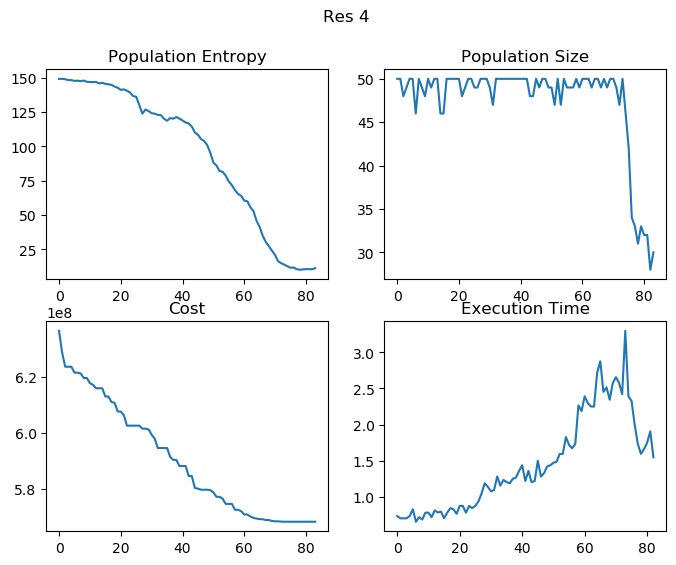

In [53]:
plotResults(res4)
suptitle("Res 4");